In [110]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [158]:
iris = datasets.load_iris()

In [160]:
# Loading the predictor value (y) and remainder of the training dataset (X) as Pandas DataFrames
X = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(data = iris['target'], columns = ['target'])

In [191]:
acc_array = np.zeros(1000)
for i in range(1000):
    # Performing a train_test_split on the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    # Instantiating a RandomForestClassifier model
    rfc_model = RandomForestClassifier()
    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy_ho = accuracy_score(y_val, val_preds)
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    # Printing out the validation metrics
    #print(f'Accuracy Score: {val_accuracy}')
    #print(f'Confusion Matrix: \n{val_confusion_matrix}')
    acc_array[i] = val_accuracy_ho
acc_array

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.94736842, 0.92105263, 0.97368421, 0.94736842, 0.92105263,
       0.92105263, 0.97368421, 0.97368421, 0.92105263, 1.        ,
       0.92105263, 0.94736842, 0.94736842, 1.        , 0.94736842,
       0.97368421, 0.97368421, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.97368421,
       0.92105263, 1.        , 0.94736842, 0.89473684, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.94736842,
       0.97368421, 0.94736842, 0.94736842, 0.92105263, 0.97368421,
       0.97368421, 0.94736842, 0.92105263, 0.89473684, 0.97368421,
       0.92105263, 0.97368421, 0.94736842, 0.97368421, 1.        ,
       0.97368421, 0.92105263, 0.86842105, 0.97368421, 0.97368421,
       0.97368421, 0.92105263, 0.94736842, 0.89473684, 0.94736842,
       1.        , 0.92105263, 0.92105263, 0.97368421, 0.97368421,
       0.94736842, 0.97368421, 0.94736842, 0.94736842, 0.89473684,
       0.97368421, 1.        , 0.97368421, 1.        , 0.92105

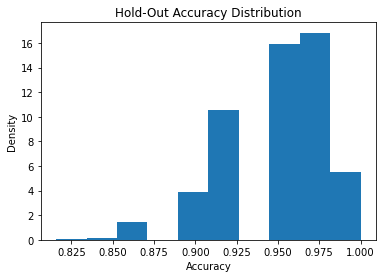

In [201]:
plt.hist(acc_array,density=True)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Hold-Out Accuracy Distribution')
plt.show()

In [196]:
sum(acc_array)/1000

0.9496052631579014

In [167]:
# Instantiating the K-Fold cross validation object with 5 folds
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [194]:
# Iterating through each of the folds in K-Fold
ave_score_array = np.zeros(1000)
for i in range(1000):
    ave_score = 0
    for train_index, val_index in k_folds.split(X):
    
        # Splitting the training set from the validation set for this specific fold
        X_train, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Instantiating a RandomForestClassifier model
        rfc_model = RandomForestClassifier()

        # Fitting the X_train and y_train datasets to the RandomForestClassifier model
        rfc_model.fit(X_train, y_train)

        # Getting inferential predictions for the validation dataset
        val_preds = rfc_model.predict(X_val)

        # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
        val_accuracy = accuracy_score(y_val, val_preds)
        val_confusion_matrix = confusion_matrix(y_val, val_preds)

        # Printing out the validation metrics
        ave_score += val_accuracy
        #print(f'Accuracy Score: {val_accuracy}')
        #print(f'Confusion Matrix: \n{val_confusion_matrix}')
    ave_score_array[i] = ave_score / 10
ave_score_array

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

array([0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.94666667, 0.94666667, 0.95333333, 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.95333333, 0.95333333,
       0.95333333, 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.95333333, 0.96      , 0.96      , 0.96      ,
       0.95333333, 0.96      , 0.96      , 0.95333333, 0.96      ,
       0.95333333, 0.96      , 0.96      , 0.96      , 0.95333333,
       0.95333333, 0.96      , 0.96      , 0.95333333, 0.96      ,
       0.95333333, 0.95333333, 0.96      , 0.96      , 0.95333333,
       0.95333333, 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.95333333, 0.94666667, 0.96      , 0.96      ,
       0.95333333, 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.96      , 0.95333

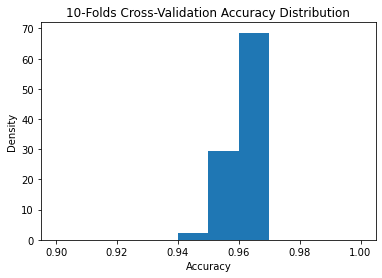

In [200]:
plt.hist(ave_score_array,density = True,range = (0.9,1))
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('10-Folds Cross-Validation Accuracy Distribution')
plt.show()

In [198]:
sum(ave_score_array)/1000

0.9577666666666806